In [8]:
def plot_digit(x,idx):
    some_digit=x[idx,:,:]
    some_digit=some_digit.reshape(28,28)
    import matplotlib.pyplot as plt
    plt.imshow(some_digit,cmap=plt.get_cmap("binary"))

In [9]:
#Data Retrival
import idx2numpy
import numpy as np
file="t10k-images-idx3-ubyte"
x_test=idx2numpy.convert_from_file(file)
file="t10k-labels.idx1-ubyte"
y_test=idx2numpy.convert_from_file(file)
file="train-images-idx3-ubyte"
x_train_val=idx2numpy.convert_from_file(file)
file="train-labels-idx1-ubyte"
y_train_val=idx2numpy.convert_from_file(file)

test_fold=np.zeros((60000,1))
from sklearn.model_selection import StratifiedShuffleSplit
sss=StratifiedShuffleSplit(n_splits=1,test_size=10000)
for train_index,test_index in sss.split(x_train_val,y_train_val):
    x_train,y_train=x_train_val[train_index],y_train_val[train_index]
    x_val,y_val=x_train_val[test_index],y_train_val[test_index]
    test_fold[train_index]=-1 
    test_fold[test_index]=0
print("Training Set   ",x_train.shape,y_train.shape)
print("Validation Set ",x_val.shape,y_val.shape)
print("Test Set       ",x_test.shape,y_test.shape)

x_train=x_train.reshape(50000,784)
x_val=x_val.reshape(10000,784)
x_test=x_test.reshape(10000,784)
x_train_val=x_train_val.reshape(60000,784)

from sklearn.preprocessing import StandardScaler
scal=StandardScaler()

Training Set    (50000, 28, 28) (50000,)
Validation Set  (10000, 28, 28) (10000,)
Test Set        (10000, 28, 28) (10000,)


In [10]:
scal.fit(x_train)
x_train=scal.transform(x_train)
x_val=scal.transform(x_val)
x_test=scal.transform(x_test)
x_train_val=scal.transform(x_train_val)

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import PredefinedSplit
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

ps=PredefinedSplit(test_fold)

In [12]:
rfc=ExtraTreesClassifier(n_jobs=-1,warm_start=True)
n_est_linspace=7
max_depth_linspace=6
param_grid_rfc={'n_estimators':np.linspace(1,600,n_est_linspace).astype(int),'max_depth':np.linspace(1,25,max_depth_linspace).astype(np.int)}
gscv_rfc=GridSearchCV(estimator=rfc,param_grid=param_grid_rfc,scoring="accuracy",n_jobs=-1,verbose=10,cv=ps)

In [13]:
gscv_rfc.fit(x_train_val,y_train_val)
print(gscv_rfc.best_score_)
print(gscv_rfc.best_params_)

Fitting 1 folds for each of 42 candidates, totalling 42 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:   18.1s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   58.1s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  2.9min
/home/psr/anaconda3/lib/python3.7/site-packages/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.9min
[Parallel(n_jobs=-1)]: Done  32 out of  42 | elapsed: 10.2min remaining:  3.2min
[Parallel(n_jobs=-1)]: Done  37 out of  42 | elapsed: 16.0min remaining:  2.2min
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed: 22.9min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  42 out of  42 | elapsed: 22.9min finished


0.9725
{'max_depth': 25, 'n_estimators': 400}


In [14]:
scores=[]
for score in gscv_rfc.cv_results_["split0_test_score"]:
    scores=np.append(scores,score)
x_estimators=[]
for estimators in gscv_rfc.cv_results_["param_n_estimators"]:
    x_estimators=np.append(x_estimators,estimators)
y_depths=[]
for depth in gscv_rfc.cv_results_["param_max_depth"]:
    y_depths=np.append(y_depths,depth)

In [15]:
x_estimators_graph=x_estimators.reshape(max_depth_linspace,n_est_linspace)
scores_graph_x=scores.reshape(max_depth_linspace,n_est_linspace)
scores_graph_y=scores.reshape(n_est_linspace,max_depth_linspace,order='F')
y_depths_graph=y_depths.reshape(n_est_linspace,max_depth_linspace,order='F')

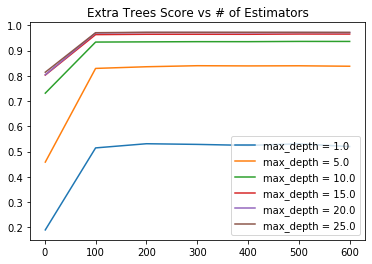

In [16]:
for i in range(max_depth_linspace):
    
    plt.plot(x_estimators_graph[i,:],scores_graph_x[i,:],label="max_depth = "+y_depths_graph[0,i].astype(str))
    plt.legend()
    plt.title("Extra Trees Score vs # of Estimators")
    plt.rcParams["figure.figsize"] = (10,10)
    plt.savefig('et_Score_Estimators.png', bbox_inches='tight')

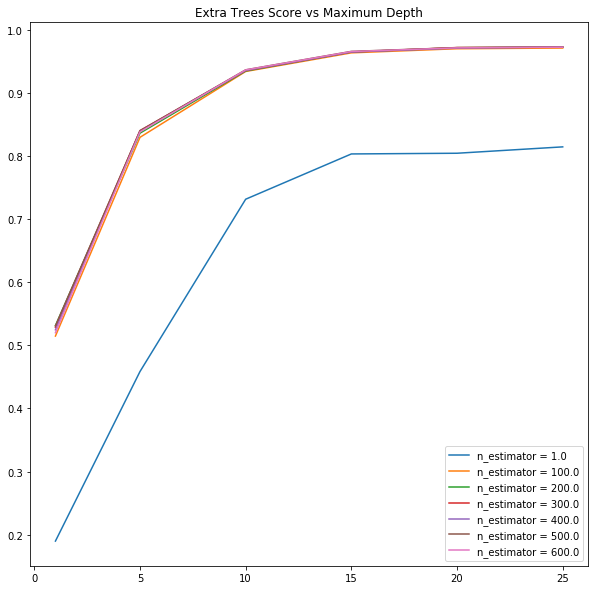

In [17]:

for i in range(n_est_linspace):
    
    plt.plot(y_depths_graph[i,:],scores_graph_y[i,:],label="n_estimator = "+x_estimators_graph[0,i].astype(str))
    plt.legend()
    plt.title("Extra Trees Score vs Maximum Depth")
    plt.rcParams["figure.figsize"] = (10,10)
    plt.savefig('et_Score_MaxDepth.png', bbox_inches='tight')
   


In [18]:
data=gscv_rfc.cv_results_

In [19]:
np.save("et_data.npy",data)

In [20]:
x_estimators_graph

array([[  1., 100., 200., 300., 400., 500., 600.],
       [  1., 100., 200., 300., 400., 500., 600.],
       [  1., 100., 200., 300., 400., 500., 600.],
       [  1., 100., 200., 300., 400., 500., 600.],
       [  1., 100., 200., 300., 400., 500., 600.],
       [  1., 100., 200., 300., 400., 500., 600.]])

In [21]:
scores_graph_x

array([[0.1899, 0.5146, 0.5311, 0.5285, 0.5245, 0.5307, 0.5199],
       [0.4584, 0.8293, 0.8359, 0.84  , 0.8392, 0.8397, 0.8379],
       [0.7313, 0.9336, 0.9344, 0.9352, 0.9352, 0.9362, 0.9361],
       [0.803 , 0.9631, 0.9645, 0.9645, 0.9644, 0.9654, 0.9652],
       [0.8041, 0.9696, 0.9713, 0.9715, 0.9706, 0.9713, 0.971 ],
       [0.8142, 0.9707, 0.9723, 0.9722, 0.9725, 0.9721, 0.972 ]])

In [22]:
y_depths_graph

array([[ 1.,  5., 10., 15., 20., 25.],
       [ 1.,  5., 10., 15., 20., 25.],
       [ 1.,  5., 10., 15., 20., 25.],
       [ 1.,  5., 10., 15., 20., 25.],
       [ 1.,  5., 10., 15., 20., 25.],
       [ 1.,  5., 10., 15., 20., 25.],
       [ 1.,  5., 10., 15., 20., 25.]])

In [ ]:
{'max_depth': 20, 'n_estimators': 200}